# ***Exploratory analyses of the survey data***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from collections import Counter

In [2]:
survey = pd.read_excel(r"D:/Survey-analysis/survey_DB.xlsx", sheet_name = "survey")
# survey = pd.read_excel(r"./survey_whoopsies.xlsx")

### ***Inferential & correlational visualizations***
- relationship between farmers' age & education       
`Are older farmers less educated than their younger counterparts?`  ✔ 

- relationship between farmers' age & willigness to adopt IPM       
`Are older farmers less willing to adopt IPM?`   ✔ 

- relationship between farmers' educational status & willigness to adopt IPM      
`Are better educated farmers more willing to adopt IPM compared to their less educated peers?`  ✔ 

- farm land area by GS div      
`Which GS div has the largest & smallest grape vineyards?`  ✔

- influence of age, education in personal protectional precautions       
`Are younger farmers more attentive to personal protectional practices compared to older ones?`      ✔            
`Are better educated farmers considering PPE more seriously than their less eductaed counterparts?` ✔

- influence of years of experience in adopting IPM     
`How experience influences the farmers willingness to try new techniques? Are there any prejudices & unfound biases in play here?`     ✔

- influence of farmland area in adopting IPM      
`Are farmers with larger fileds less welcoming to IPM since the losses are likely to be high for them or is the trend opposite since small holders have a large risk factor?` ✔

- influence of intercropping on fertilizer application       
`Do farmers who practice intercropping apply fertilizers more frequently than who do not?`     ✔

- influence of intercropping on manure application        
`Do farmers who practice intercropping apply manures more frequently than who do not?`    ✔ 

- influence of crop rotation on fertilizer application       
`Do farmers who practice crop rotation apply fertilizers more frequently than who do not?`     ✔

- influence of crop rotation on manure application      
`Do farmers who practice crop rotation apply manures more frequently than who do not?`     ✔

- relationship between land area & yield per season      
`Are there any relationships between land area & yield per unit area?`     ✔

- relationship between rootstock age and seasonal yield       
`Does the seasonal yield truly decrease with the age of rootstock as many farmers claimed? `    ✔  

- relationship between fertilizer, manure application and seasonal yield        
`Do farmers who apply fertilizers & manures more frequently enjoy better harvests?`        ✔

- relationship bewteen frequency of fungicide application and seasonal yield      
`Does spraying fungicides more frequently improve yield?`

### ***Q1.`Are older farmers less educated than their younger counterparts?`***

In [132]:
temp = survey.loc[:, ["age", "education"]].dropna(axis = 0)

In [133]:
below_36 = temp.loc[temp.age.isin(range(0, 36)), :]
below_50 = temp.loc[temp.age.isin(range(36, 50)), :]
above_50 = temp.loc[temp.age.isin(range(50, 100)), :]

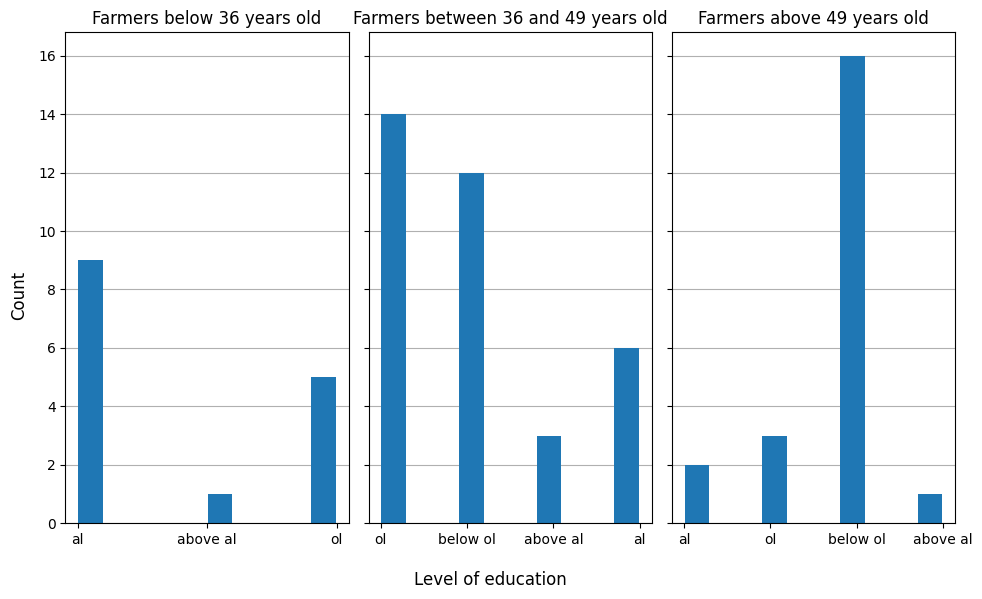

In [135]:
fig, (axes_0, axes_1, axes_2) = plt.subplots(nrows = 1, ncols = 3, sharey = True)
fig.set_size_inches(10, 6)
fig.supxlabel("Level of education")
fig.supylabel("Count")

categories = ["Farmers below 36 years old", "Farmers between 36 and 49 years old", "Farmers above 49 years old"]
for table, axes, category in zip([below_36, below_50, above_50], [axes_0, axes_1, axes_2], categories):
    axes.hist(table.education, rwidth = 0.95)
    axes.set_title(category)
    axes.grid(axis = "y")
    axes.set_axisbelow(True)
    
plt.tight_layout()
plt.show()

### ***Q2.`Are older farmers less willing to adopt IPM?`***

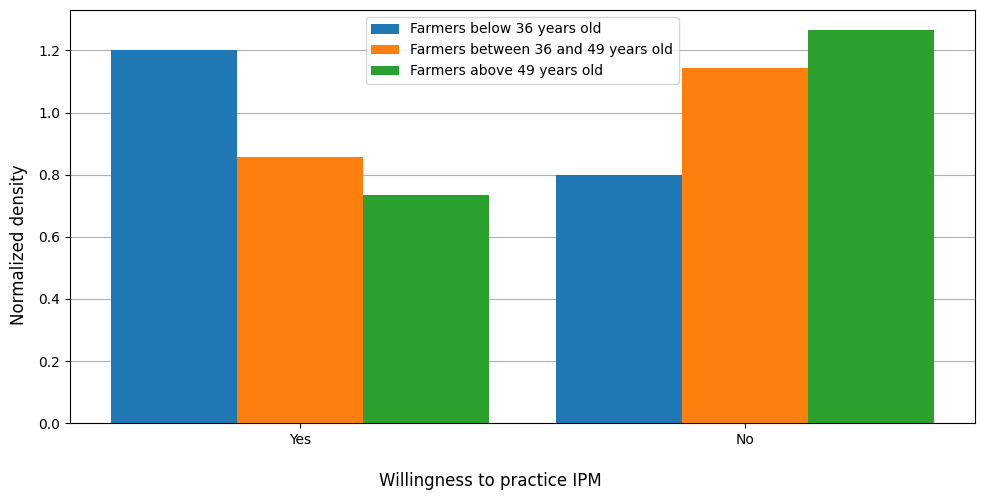

In [130]:
temp = survey.loc[:, ["age", "willingness_ipm"]].dropna(axis = 0)

below_36 = temp.loc[temp.age.isin(range(0, 36)), :]
below_50 = temp.loc[temp.age.isin(range(36, 50)), :]
above_50 = temp.loc[temp.age.isin(range(50, 100)), :]

fig, axes = plt.subplots(nrows = 1, ncols = 1, sharey = True)
fig.set_size_inches(10, 5)
fig.supxlabel("Willingness to practice IPM")
fig.supylabel("Normalized density")

categories = ["Farmers below 36 years old", "Farmers between 36 and 49 years old", "Farmers above 49 years old"]
axes.hist([below_36.willingness_ipm, below_50.willingness_ipm, above_50.willingness_ipm],
          label = categories, bins = 2, density = True, rwidth = 0.85)
axes.set_xticks(ticks = [0.25, 0.75], labels = ["Yes", "No"])
axes.legend()
axes.grid(axis = "y")
axes.set_axisbelow(True)
    
plt.tight_layout()
plt.show()

### ***Q3.`Are better educated farmers more willing to adopt IPM compared to their less educated peers?`***

In [7]:
survey.education.dropna().unique()

array(['ol', 'below ol', 'above al', 'al'], dtype=object)

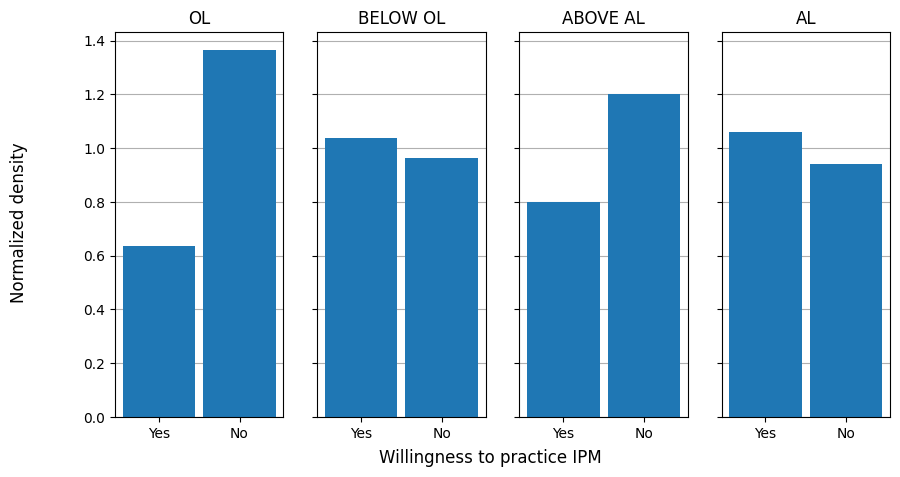

In [8]:
temp = survey.loc[:, ["education", "willingness_ipm"]].dropna(axis = 0)

fig, (axes_0, axes_1, axes_2, axes_3) = plt.subplots(nrows = 1, ncols = 4, sharey = True)
fig.set_size_inches(10, 5)
fig.supxlabel("Willingness to practice IPM")
fig.supylabel("Normalized density")

ed_levels = survey.education.dropna().unique()

for axes, edu in zip((axes_0, axes_1, axes_2, axes_3), ed_levels):
    axes.hist(temp[temp.education == edu].loc[:, "willingness_ipm"], bins = 2, rwidth = 0.9, density = True)
    # print(temp[temp.education == edu].loc[:, "willingness_ipm"])
    axes.set_title(edu.upper())
    axes.set_axisbelow(True)
    axes.grid(axis = "y")
    axes.set_xticks(ticks = [0.25, 0.75], labels = ["Yes", "No"])

plt.show()

### ***Q4.`Which GS div has the largest & smallest grape vineyards?`***

In [12]:
survey.GS_Division.unique()  #, survey.land_area

array(['J 264', 'J 206', nan, 'J 176', 'J 207', 'J 222', 'J 223', 'J 221',
       'J 259', 'J 270', 'J 287', 'J 266', 'J 263', 'J 225', 'J 226',
       'J 224', 'J 262', 'J 275', 'J 220', 'J 214', 'J 228', 'J 146',
       'J 254', 'J 255'], dtype=object)

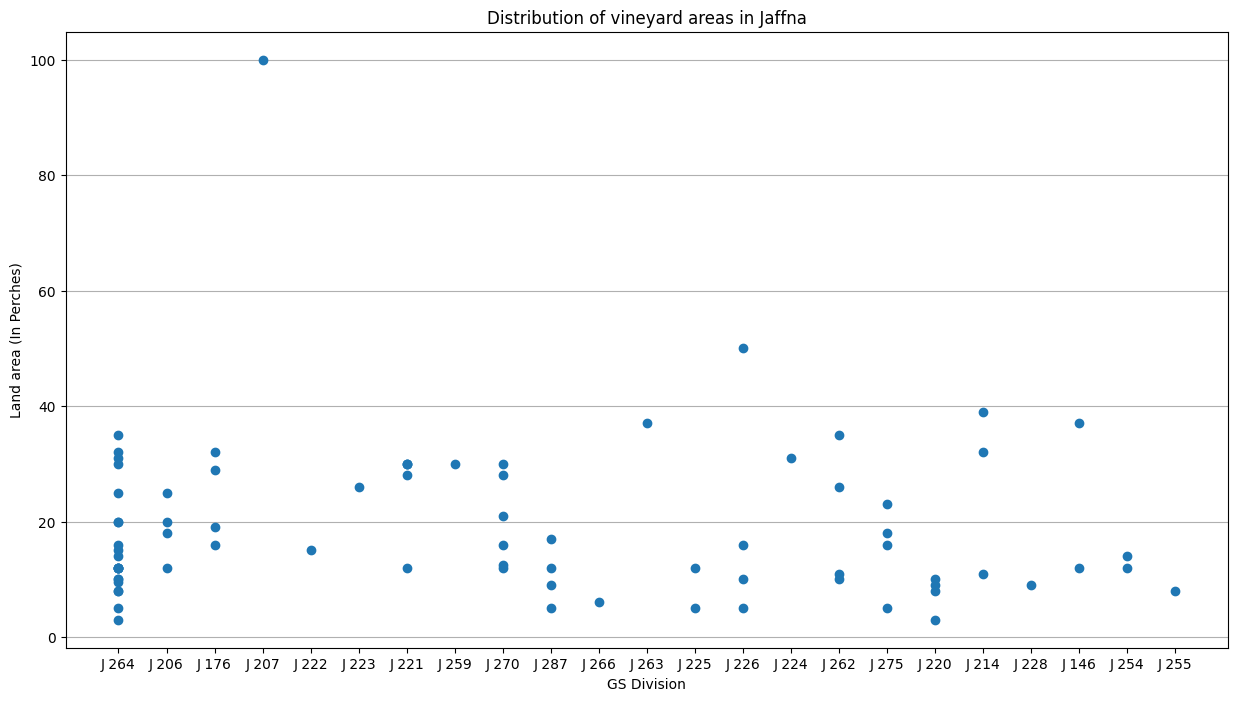

In [127]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(15, 8)
temp = survey.loc[:, ["GS_Division", "land_area"]].dropna(axis = 0)

axes.scatter(temp.GS_Division, temp.land_area, marker = "o") #, s = temp.land_area * 2)
axes.set_xlabel("GS Division")
axes.set_ylabel("Land area (In Perches)")
axes.grid(axis = "y")
axes.set_axisbelow(True)
axes.set_title("Distribution of vineyard areas in Jaffna")
plt.show()

### ***Q5. `Are younger farmers more attentive to personal protectional practices compared to older ones?, Are better educated farmers considering PPE more seriously than their less eductaed counterparts?`***

In [43]:
survey.ppe.unique()

array(['good', 'moderate', 'poor'], dtype=object)

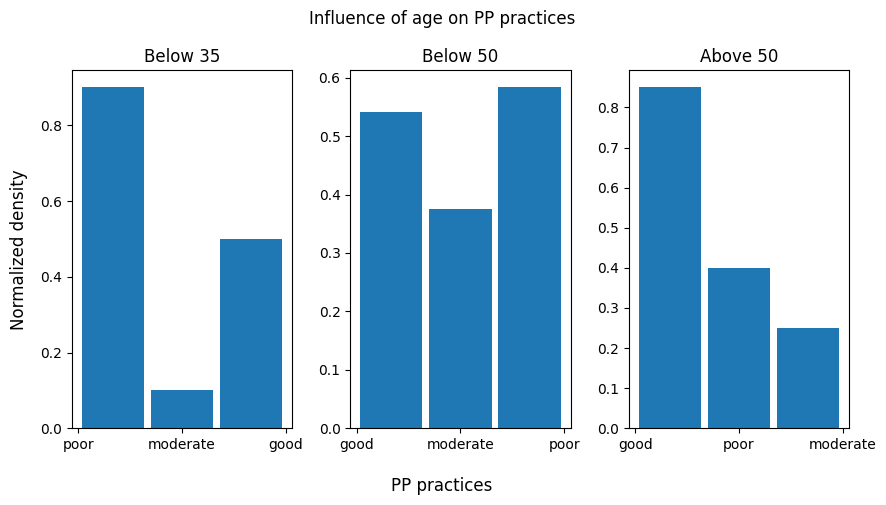

In [121]:
# facet the data by age group
below_35 = np.arange(0, 35, 1)
below_50 = np.arange(35, 50, 1)
above_50 = np.arange(50, 100, 1)

ranges = [below_35, below_50, above_50]
labels = ["Below 35", "Below 50", "Above 50"]

fig, (axes_0, axes_1, axes_2) = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(9, 5)
axes = (axes_0, axes_1, axes_2)

for axes_, range_, label in zip(axes, ranges, labels):
    axes_.hist(survey[survey.age.isin(range_)].loc[:, "ppe"], bins = 3, rwidth = 0.9, density = True)
    axes_.set_title(label)                            

fig.supxlabel("PP practices")
fig.supylabel("Normalized density")
fig.suptitle("Influence of age on PP practices")
plt.tight_layout()
plt.show()

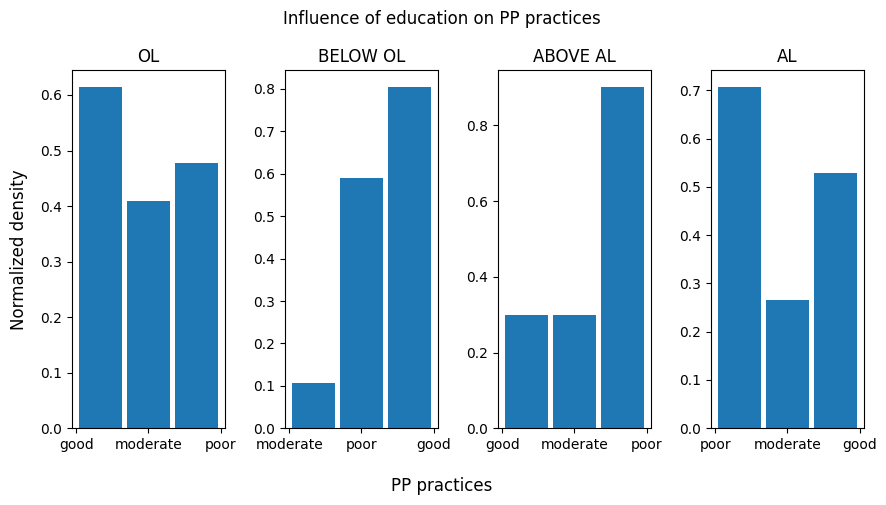

In [120]:
fig, (axes_0, axes_1, axes_2, axes_3) = plt.subplots(nrows = 1, ncols = 4)
fig.set_size_inches(9, 5)
axes = (axes_0, axes_1, axes_2, axes_3)

for axes_, edu in zip(axes, survey.education.dropna().unique()):
    axes_.hist(survey[survey.education == edu].loc[:, "ppe"], bins = 3, rwidth = 0.9, density = True)
    axes_.set_title(edu.upper())                            

fig.supxlabel("PP practices")
fig.supylabel("Normalized density")
fig.suptitle("Influence of education on PP practices")
plt.tight_layout()
plt.show()

### ***Q6.`How experience influences the farmers willingness to try new techniques? Are there any prejudices & unfound biases in play here?`***

In [93]:
# 0 - 15, 15 - 30, 30 - 45
survey.PEI_viticulture.max()

45

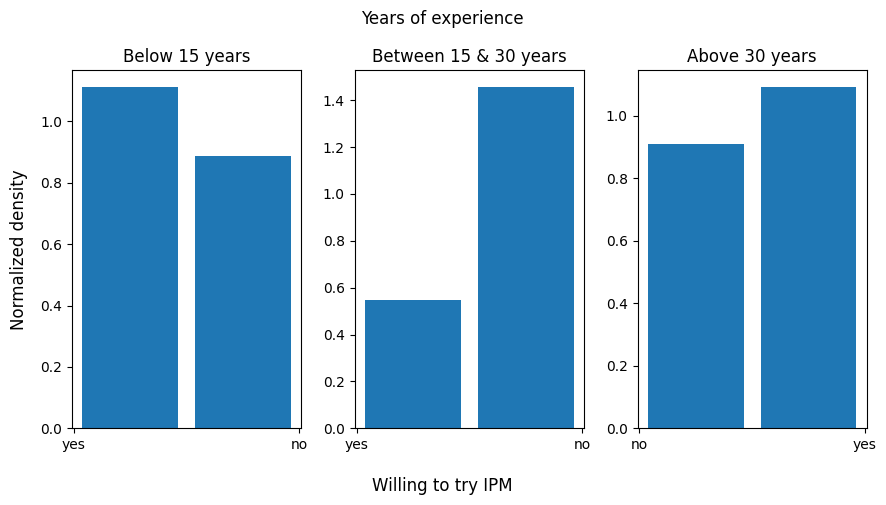

In [100]:
fig, (axes_0, axes_1, axes_2) = plt.subplots(nrows = 1, ncols = 3)
axes = (axes_0, axes_1, axes_2)
fig.set_size_inches(9, 5)

exp_category = [range(0, 16), range(16, 31), range(31, 46)]
titles = ["Below 15 years", "Between 15 & 30 years", "Above 30 years"]

for axes_, exp, title in zip(axes, exp_category, titles):
    axes_.hist(survey[survey.PEI_viticulture.isin(exp)].loc[:, "willingness_ipm"].dropna(), bins = 2, rwidth = 0.85, density = True)
    axes_.set_title(title)

fig.suptitle("Years of experience")
fig.supylabel("Normalized density")
fig.supxlabel("Willing to try IPM")
plt.tight_layout()
plt.show()

### ***Q7.`Are farmers with larger fileds less welcoming to IPM since the losses are likely to be high for them or is the trend opposite since small holders have a large risk factor?`***

In [102]:
survey.land_area.min(), survey.land_area.max()

(3.0, 100.0)

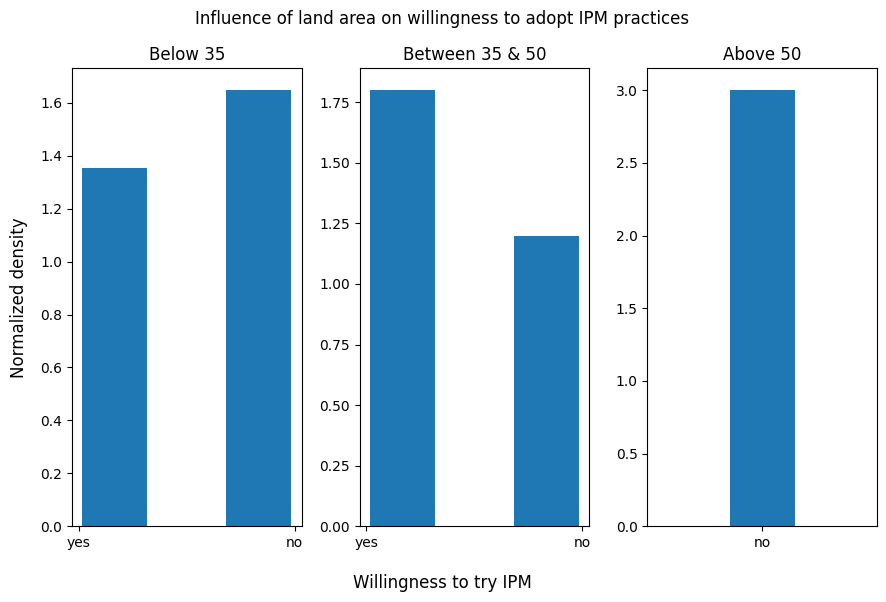

In [119]:
# facet the data by age group
below_35 = np.arange(0, 35, 1)
below_50 = np.arange(35, 50, 1)
above_50 = np.arange(50, 100, 1)

ranges = [below_35, below_50, above_50]
labels = ["Below 35", "Between 35 & 50", "Above 50"]

fig, (axes_0, axes_1, axes_2) = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(9, 6)
axes = (axes_0, axes_1, axes_2)

for axes_, range_, label in zip(axes, ranges, labels):
    axes_.hist(survey[survey.land_area.isin(range_)].loc[:, "willingness_ipm"].dropna(), bins = 3, rwidth = 0.9, density = True)
    axes_.set_title(label)                            

fig.supxlabel("Willingness to try IPM")
fig.supylabel("Normalized density")
fig.suptitle("Influence of land area on willingness to adopt IPM practices")
plt.tight_layout()
plt.show()

### ***Q8.``Do farmers who practice intercropping apply fertilizers more frequently than those who do not?``***

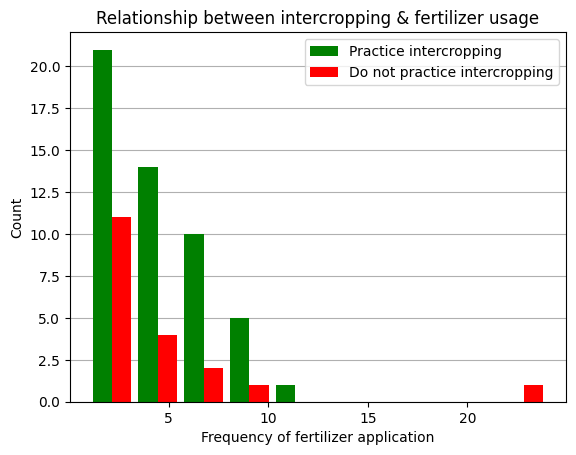

In [168]:
temp = survey.loc[:, ["intercropping", "freq_fertilizer"]].dropna(axis = 0)
plt.hist([temp[temp.intercropping == "yes"].loc[:, "freq_fertilizer"], temp[temp.intercropping == "no"].loc[:, "freq_fertilizer"]],
         color = ["green", "red"], label = ["Practice intercropping", "Do not practice intercropping"], rwidth = 0.85)

plt.xlabel("Frequency of fertilizer application")
plt.ylabel("Count")
plt.title("Relationship between intercropping & fertilizer usage")
plt.legend()
plt.grid(axis = "y")
axes = plt.gca()
axes.set_axisbelow(True)
plt.show()

### ***Q9.`Do farmers who practice crop rotation apply fertilizers more frequently than those who do not?`***

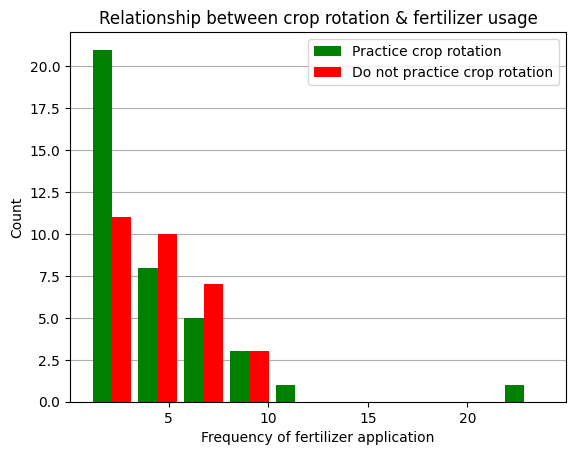

In [169]:
temp = survey.loc[:, ["crop_rotation", "freq_fertilizer"]].dropna(axis = 0)

plt.hist([temp[temp.crop_rotation == "yes"].loc[:, "freq_fertilizer"], temp[temp.crop_rotation == "no"].loc[:, "freq_fertilizer"]],
         color = ["green", "red"], label = ["Practice crop rotation", "Do not practice crop rotation"], rwidth = 0.85)
plt.xlabel("Frequency of fertilizer application")
plt.ylabel("Count")
plt.title("Relationship between crop rotation & fertilizer usage")
plt.legend()
plt.grid(axis = "y")
axes = plt.gca()
axes.set_axisbelow(True)
plt.show()

### ***Q10.`Do farmers who practice intercropping apply manures more frequently than those who do not?`***

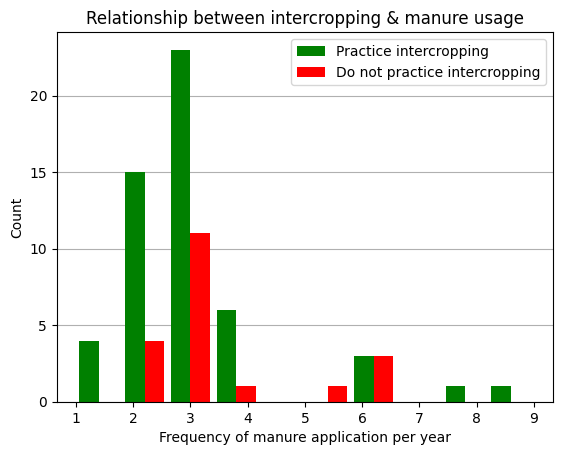

In [171]:
temp = survey.loc[:, ["intercropping", "freq_manure(perY)"]].dropna(axis = 0)

plt.hist([temp[temp.intercropping == "yes"].loc[:, "freq_manure(perY)"], temp[temp.intercropping == "no"].loc[:, "freq_manure(perY)"]],
         color = ["green", "red"], label = ["Practice intercropping", "Do not practice intercropping"], rwidth = 0.85)

plt.xlabel("Frequency of manure application per year")
plt.ylabel("Count")
plt.title("Relationship between intercropping & manure usage")
plt.legend()
plt.grid(axis = "y")
axes = plt.gca()
axes.set_axisbelow(True)
plt.show()

### ***Q11.`Do farmers who practice crop rotation apply manures more frequently than those who do not?`***

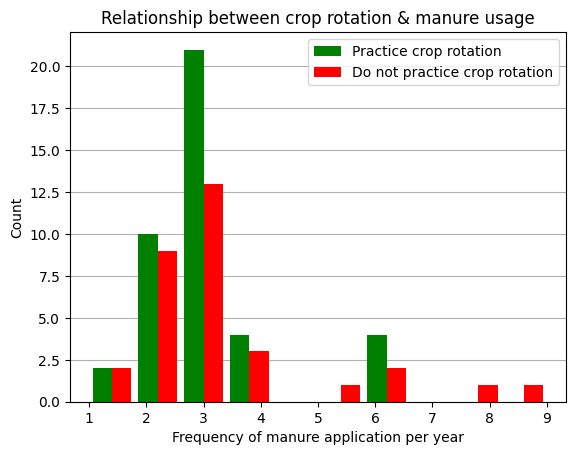

In [172]:
temp = survey.loc[:, ["crop_rotation", "freq_manure(perY)"]].dropna(axis = 0)

plt.hist([temp[temp.crop_rotation == "yes"].loc[:, "freq_manure(perY)"], temp[temp.crop_rotation == "no"].loc[:, "freq_manure(perY)"]],
         color = ["green", "red"], label = ["Practice crop rotation", "Do not practice crop rotation"], rwidth = 0.85)

plt.xlabel("Frequency of manure application per year")
plt.ylabel("Count")
plt.title("Relationship between crop rotation & manure usage")
plt.legend()
plt.grid(axis = "y")
axes = plt.gca()
axes.set_axisbelow(True)
plt.show()

### ***Q12.`Are there any relationships between land area & yield per unit area?`***

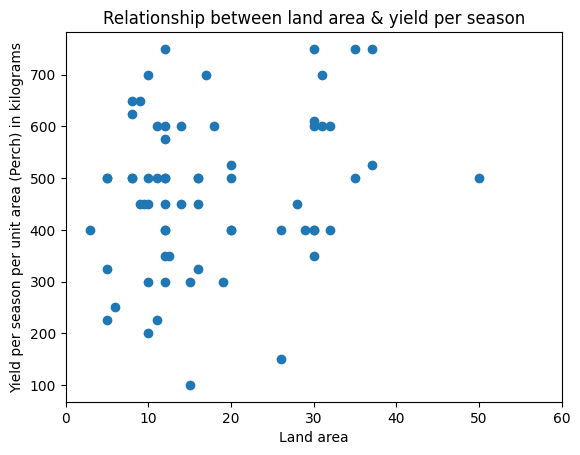

In [176]:
temp = survey.loc[:, ["land_area", "yield_per_season"]].dropna(axis = 0)

plt.scatter(temp.land_area, temp.yield_per_season)
plt.xlim(0, 60)
plt.title("Relationship between land area & yield per season")
plt.ylabel("Yield per season per unit area (Perch) in kilograms")
plt.xlabel("Land area")
plt.show()

### ***Q13.`Does the seasonal yield truly decrease with the age of rootstock as many farmers claimed?`***

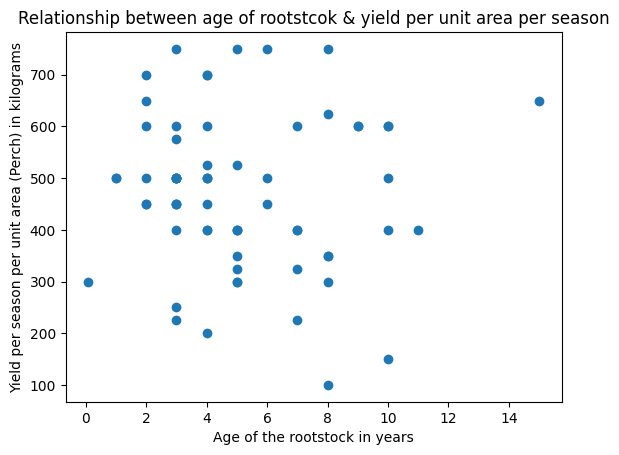

In [180]:
temp = survey.loc[:, ["rootstock_age", "yield_per_season"]].dropna(axis = 0)

plt.scatter(temp.rootstock_age, temp.yield_per_season)
plt.xlabel("Age of the rootstock in years")
plt.ylabel("Yield per season per unit area (Perch) in kilograms")
plt.title("Relationship between age of rootstcok & yield per unit area per season")
plt.show()

### ***Q14.`Do farmers who apply fertilizers & manures more frequently enjoy better harvests?`***

In [182]:
survey.freq_fertilizer.unique()

array([nan,  4.,  6.,  1.,  9.,  5.,  3., 24., 12.,  8.])

In [183]:
survey.loc[:, "freq_manure(perY)"].unique()

array([ 3.,  4.,  2., nan,  1.,  9.,  5.,  6.,  8.])

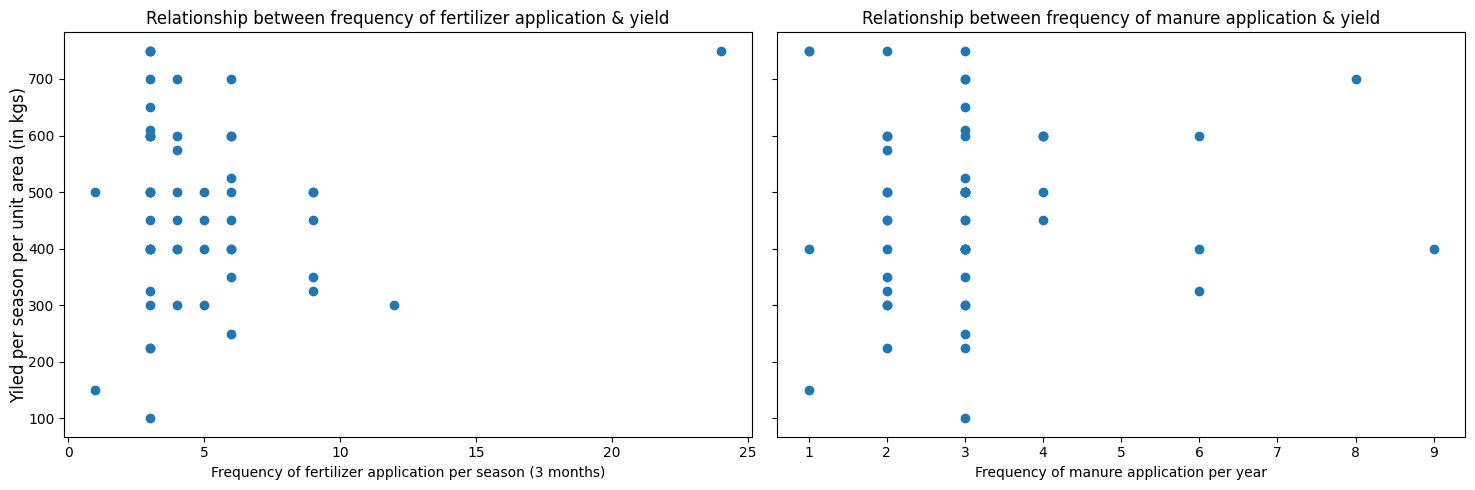

In [200]:
temp = survey.loc[:, ["freq_fertilizer", "freq_manure(perY)", "yield_per_season"]].dropna(axis = 0)
plt.rcParams["font.size"] = 10

fig, (axes_0, axes_1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)
fig.set_size_inches(15, 5)
fig.supylabel("Yiled per season per unit area (in kgs)")

axes_0.scatter(temp.freq_fertilizer, temp.yield_per_season)
axes_0.set_title("Relationship between frequency of fertilizer application & yield")
axes_0.set_xlabel("Frequency of fertilizer application per season (3 months)")

axes_1.scatter(temp.loc[:, "freq_manure(perY)"], temp.yield_per_season)
axes_1.set_title("Relationship between frequency of manure application & yield")
axes_1.set_xlabel("Frequency of manure application per year")

plt.tight_layout()
plt.show()

### ***Q15.`Does spraying fungicides more frequently improve yield?`***

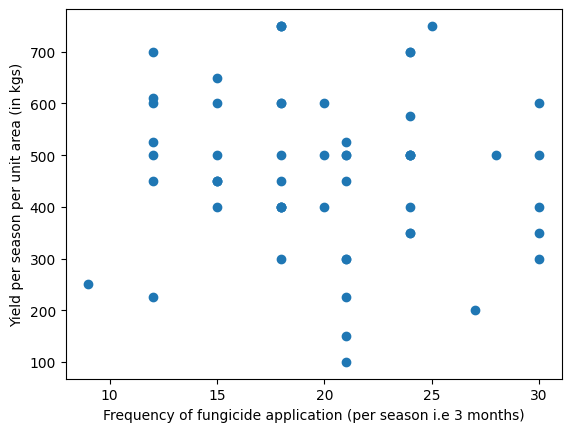

In [206]:
temp = survey.loc[:, ["freq_application", "yield_per_season"]].dropna(axis = 0)

plt.scatter(temp.freq_application, temp.yield_per_season)
plt.ylabel("Yield per season per unit area (in kgs)")
plt.xlabel("Frequency of fungicide application (per season i.e 3 months)")
plt.show()

## ***Misc.***

In [81]:
ipm = survey.loc[:, ["age", "prac_ipm", "willingness_ipm"]]
ipm.prac_ipm = ipm.prac_ipm.apply(lambda x: True if (x == "yes") else False)
ipm.willingness_ipm = ipm.willingness_ipm.apply(lambda x: True if (x == "yes") else False)
ipm = ipm.dropna(axis = 0)

ipm_pivot = pd.pivot_table(ipm, aggfunc = "sum", columns = ["age"])
ipm_pivot = ipm_pivot.T

In [82]:
# duplicated data for histograms
age_prac_ipm_hist = np.repeat(ipm_pivot.index, ipm_pivot.prac_ipm)
age_willingness_ipm_hist = np.repeat(ipm_pivot.index, ipm_pivot.willingness_ipm)

In [83]:
age_bins = np.linspace(ipm_pivot.index.min(), ipm_pivot.index.max(), num = 10, endpoint = True)

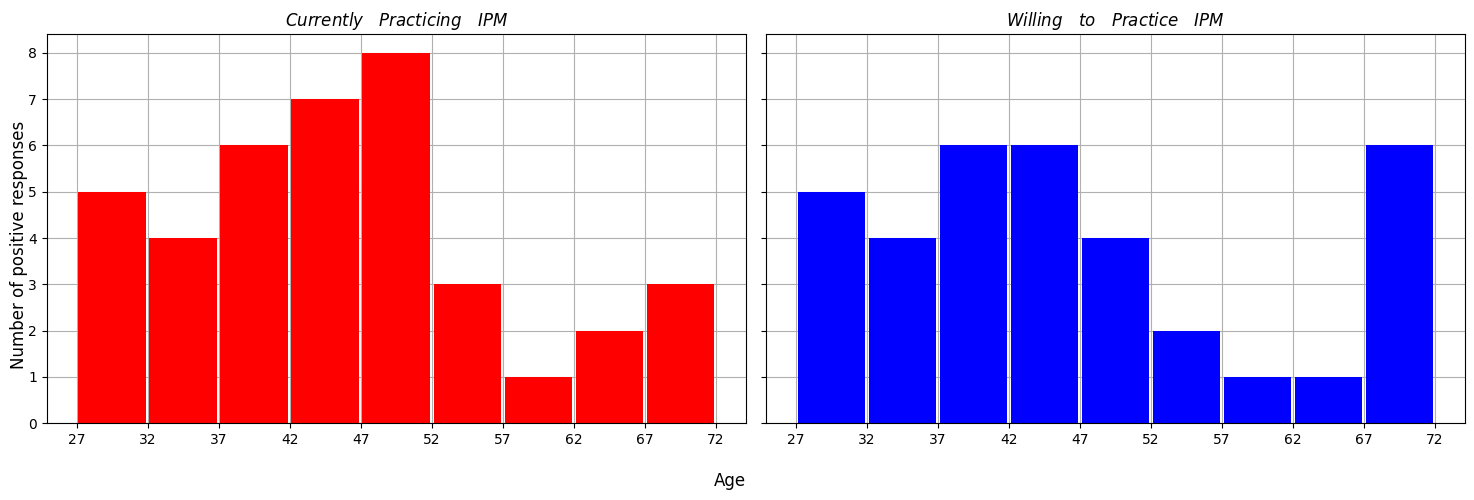

In [84]:
fig, (axes_0, axes_1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)
fig.set_size_inches(15, 5)

axes_0.hist(age_prac_ipm_hist, color = "red", bins = age_bins, rwidth = 0.95) 
axes_0.set_title("$Currently\hspace{1}Practicing\hspace{1}IPM$")
axes_0.set_xticks(age_bins)
axes_0.set_axisbelow(True)
axes_0.grid()

axes_1.hist(age_willingness_ipm_hist, color = "blue", bins = age_bins, rwidth = 0.95)
axes_1.set_title("$Willing\hspace{1}to\hspace{1}Practice\hspace{1}IPM$")
axes_1.set_xticks(age_bins)
axes_1.set_axisbelow(True)
axes_1.grid()

fig.supxlabel("Age")
fig.supylabel("Number of positive responses")
plt.tight_layout()
plt.show()

In [85]:
edu = dict()
for key in ['below ol', 'ol', 'al', 'above al']:
    edu[key.upper()] = Counter(survey.education.dropna()).get(key)

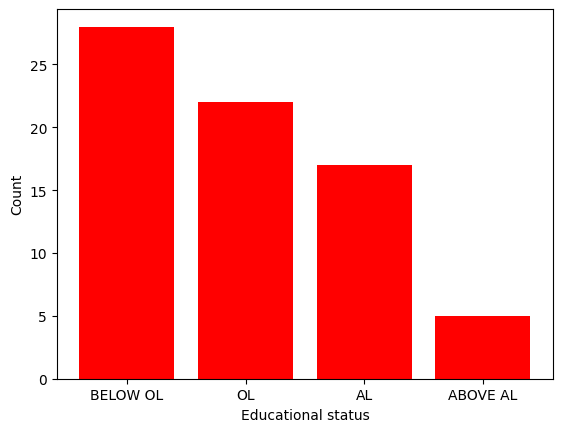

In [86]:
plt.bar(edu.keys(), edu.values(), color = "red")
plt.ylabel("Count")
plt.xlabel("Educational status")
plt.show()

### ***Local distribution of Grape vineyards***

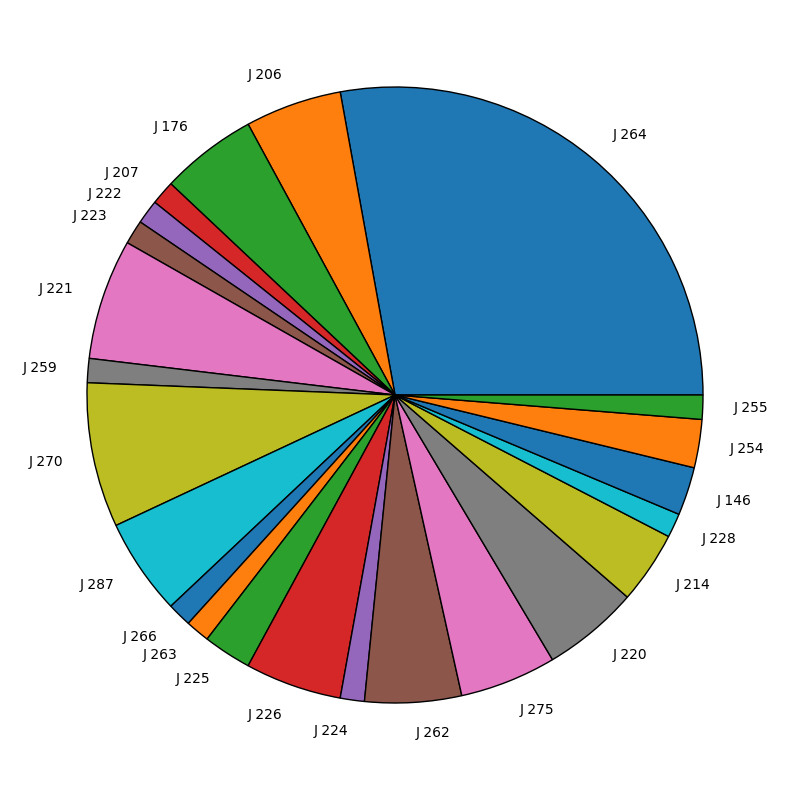

In [108]:
GS = Counter(survey.GS_Division.dropna())

fig = plt.figure(figsize = (10, 10), dpi = 100)
axes = fig.add_subplot(111)
axes.pie(GS.values(), labels = GS.keys(), wedgeprops = {"linewidth": 1, "edgecolor": "black"})
plt.show()

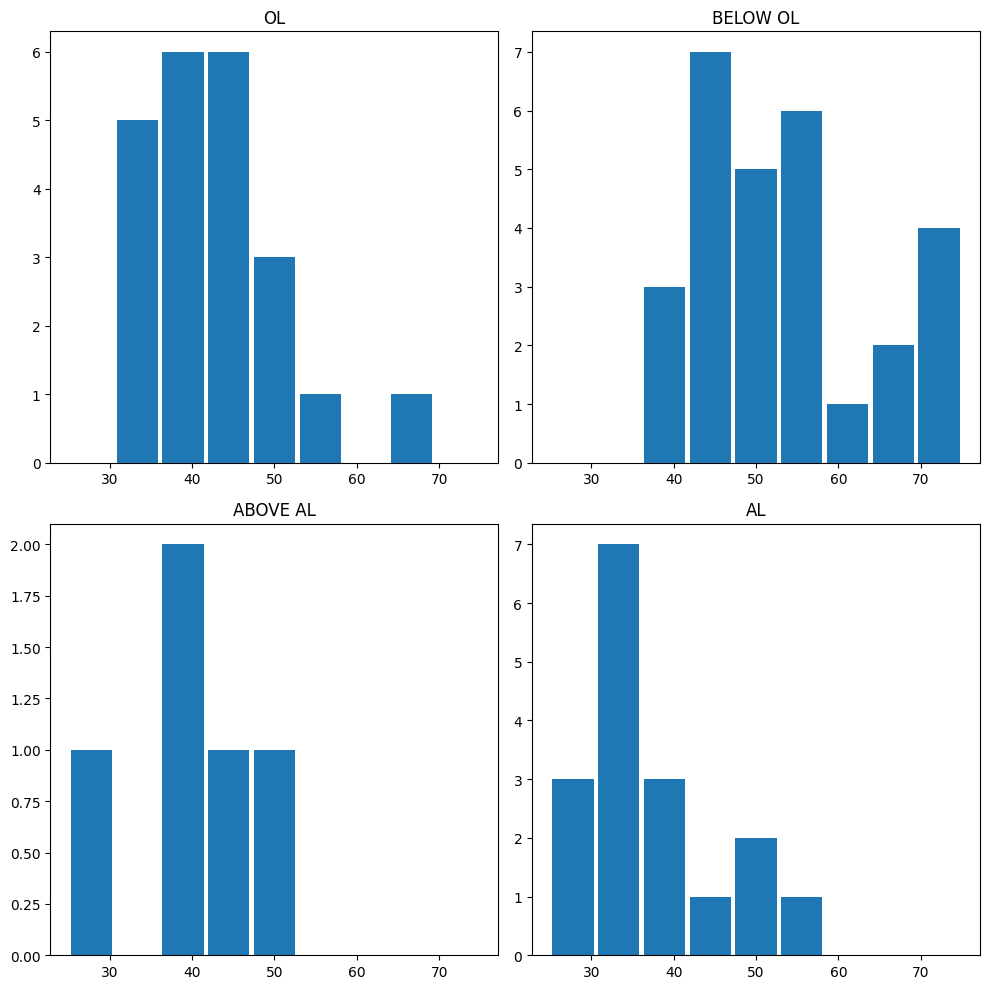

In [109]:
fig, ((axes_0, axes_1), (axes_2, axes_3)) = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(10, 10)

axes = (axes_0, axes_1, axes_2, axes_3)

for edu_level, axis in zip(survey.education.dropna().unique(), axes):
    axis.hist(survey.query("education == @edu_level").age.dropna(), bins = np.linspace(25, 75, 10), rwidth = 0.9)
    axis.set_title(edu_level.upper())

plt.tight_layout()
plt.show()

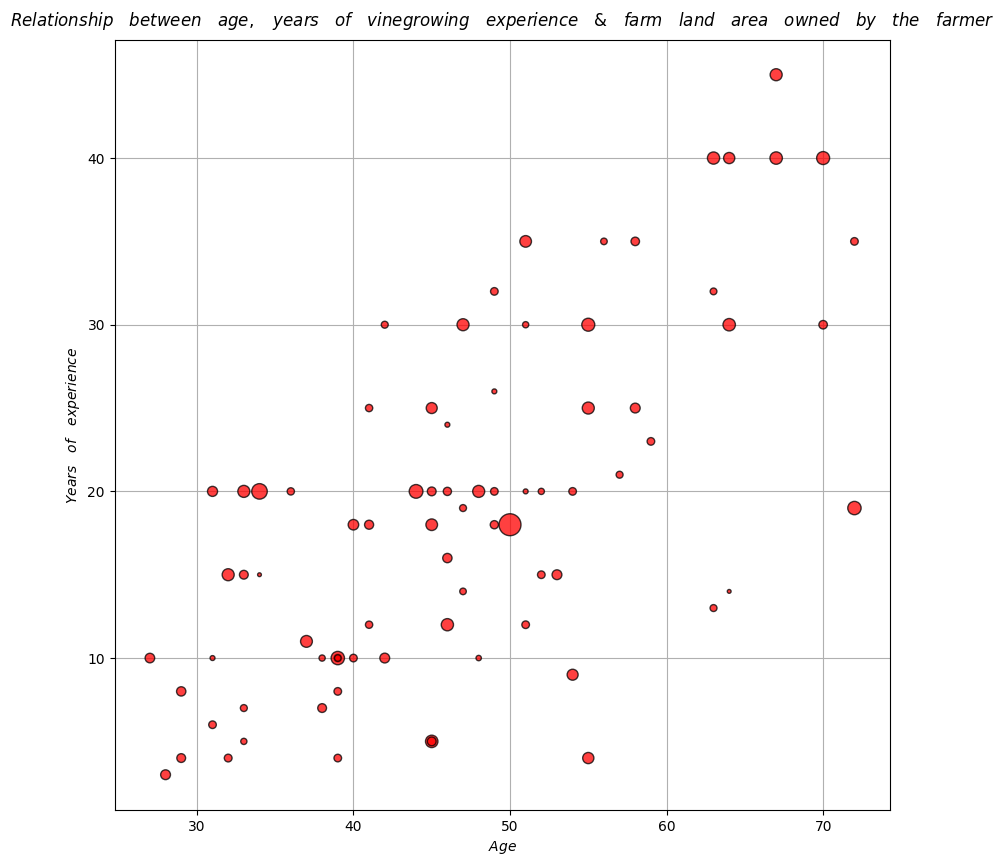

In [110]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 10)
axes.scatter(survey.age, survey.PEI_viticulture, s = survey.land_area * 2.5,
             edgecolors = 'black', color = "red", alpha = 0.75) 
axes.set_xlabel("$Age$")
axes.set_ylabel("$Years\hspace{1}of\hspace{1}experience$")
axes.set_title("$Relationship\hspace{1}between\hspace{1}age,\hspace{1}years\hspace{1}of\hspace{1}vinegrowing\hspace{1}\
experience\hspace{1}&\hspace{1}farm\hspace{1}land\hspace{1}area\hspace{1}owned\hspace{1}by\hspace{1}the\hspace{1}farmer$", pad = 10)
axes.grid()
axes.set_axisbelow(True)
plt.show()

### ***Fungicide application based on AI division***

C:\Users\Anoban\AppData\Local\Temp\ipykernel_1712\3452366425.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labels = axes.get_xticklabels(), rotation = 90);
C:\Users\Anoban\AppData\Local\Temp\ipykernel_1712\3452366425.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labels = axes.get_xticklabels(), rotation = 90);
C:\Users\Anoban\AppData\Local\Temp\ipykernel_1712\3452366425.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labels = axes.get_xticklabels(), rotation = 90);
C:\Users\Anoban\AppData\Local\Temp\ipykernel_1712\3452366425.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labels = axes.get_xticklabels(), rotation = 90);
C:\Users\Anoban\AppData\Local\Temp\ipykernel_1712\3452366425.py:12: UserWarning: FixedFormatter should only be used together with FixedLocat

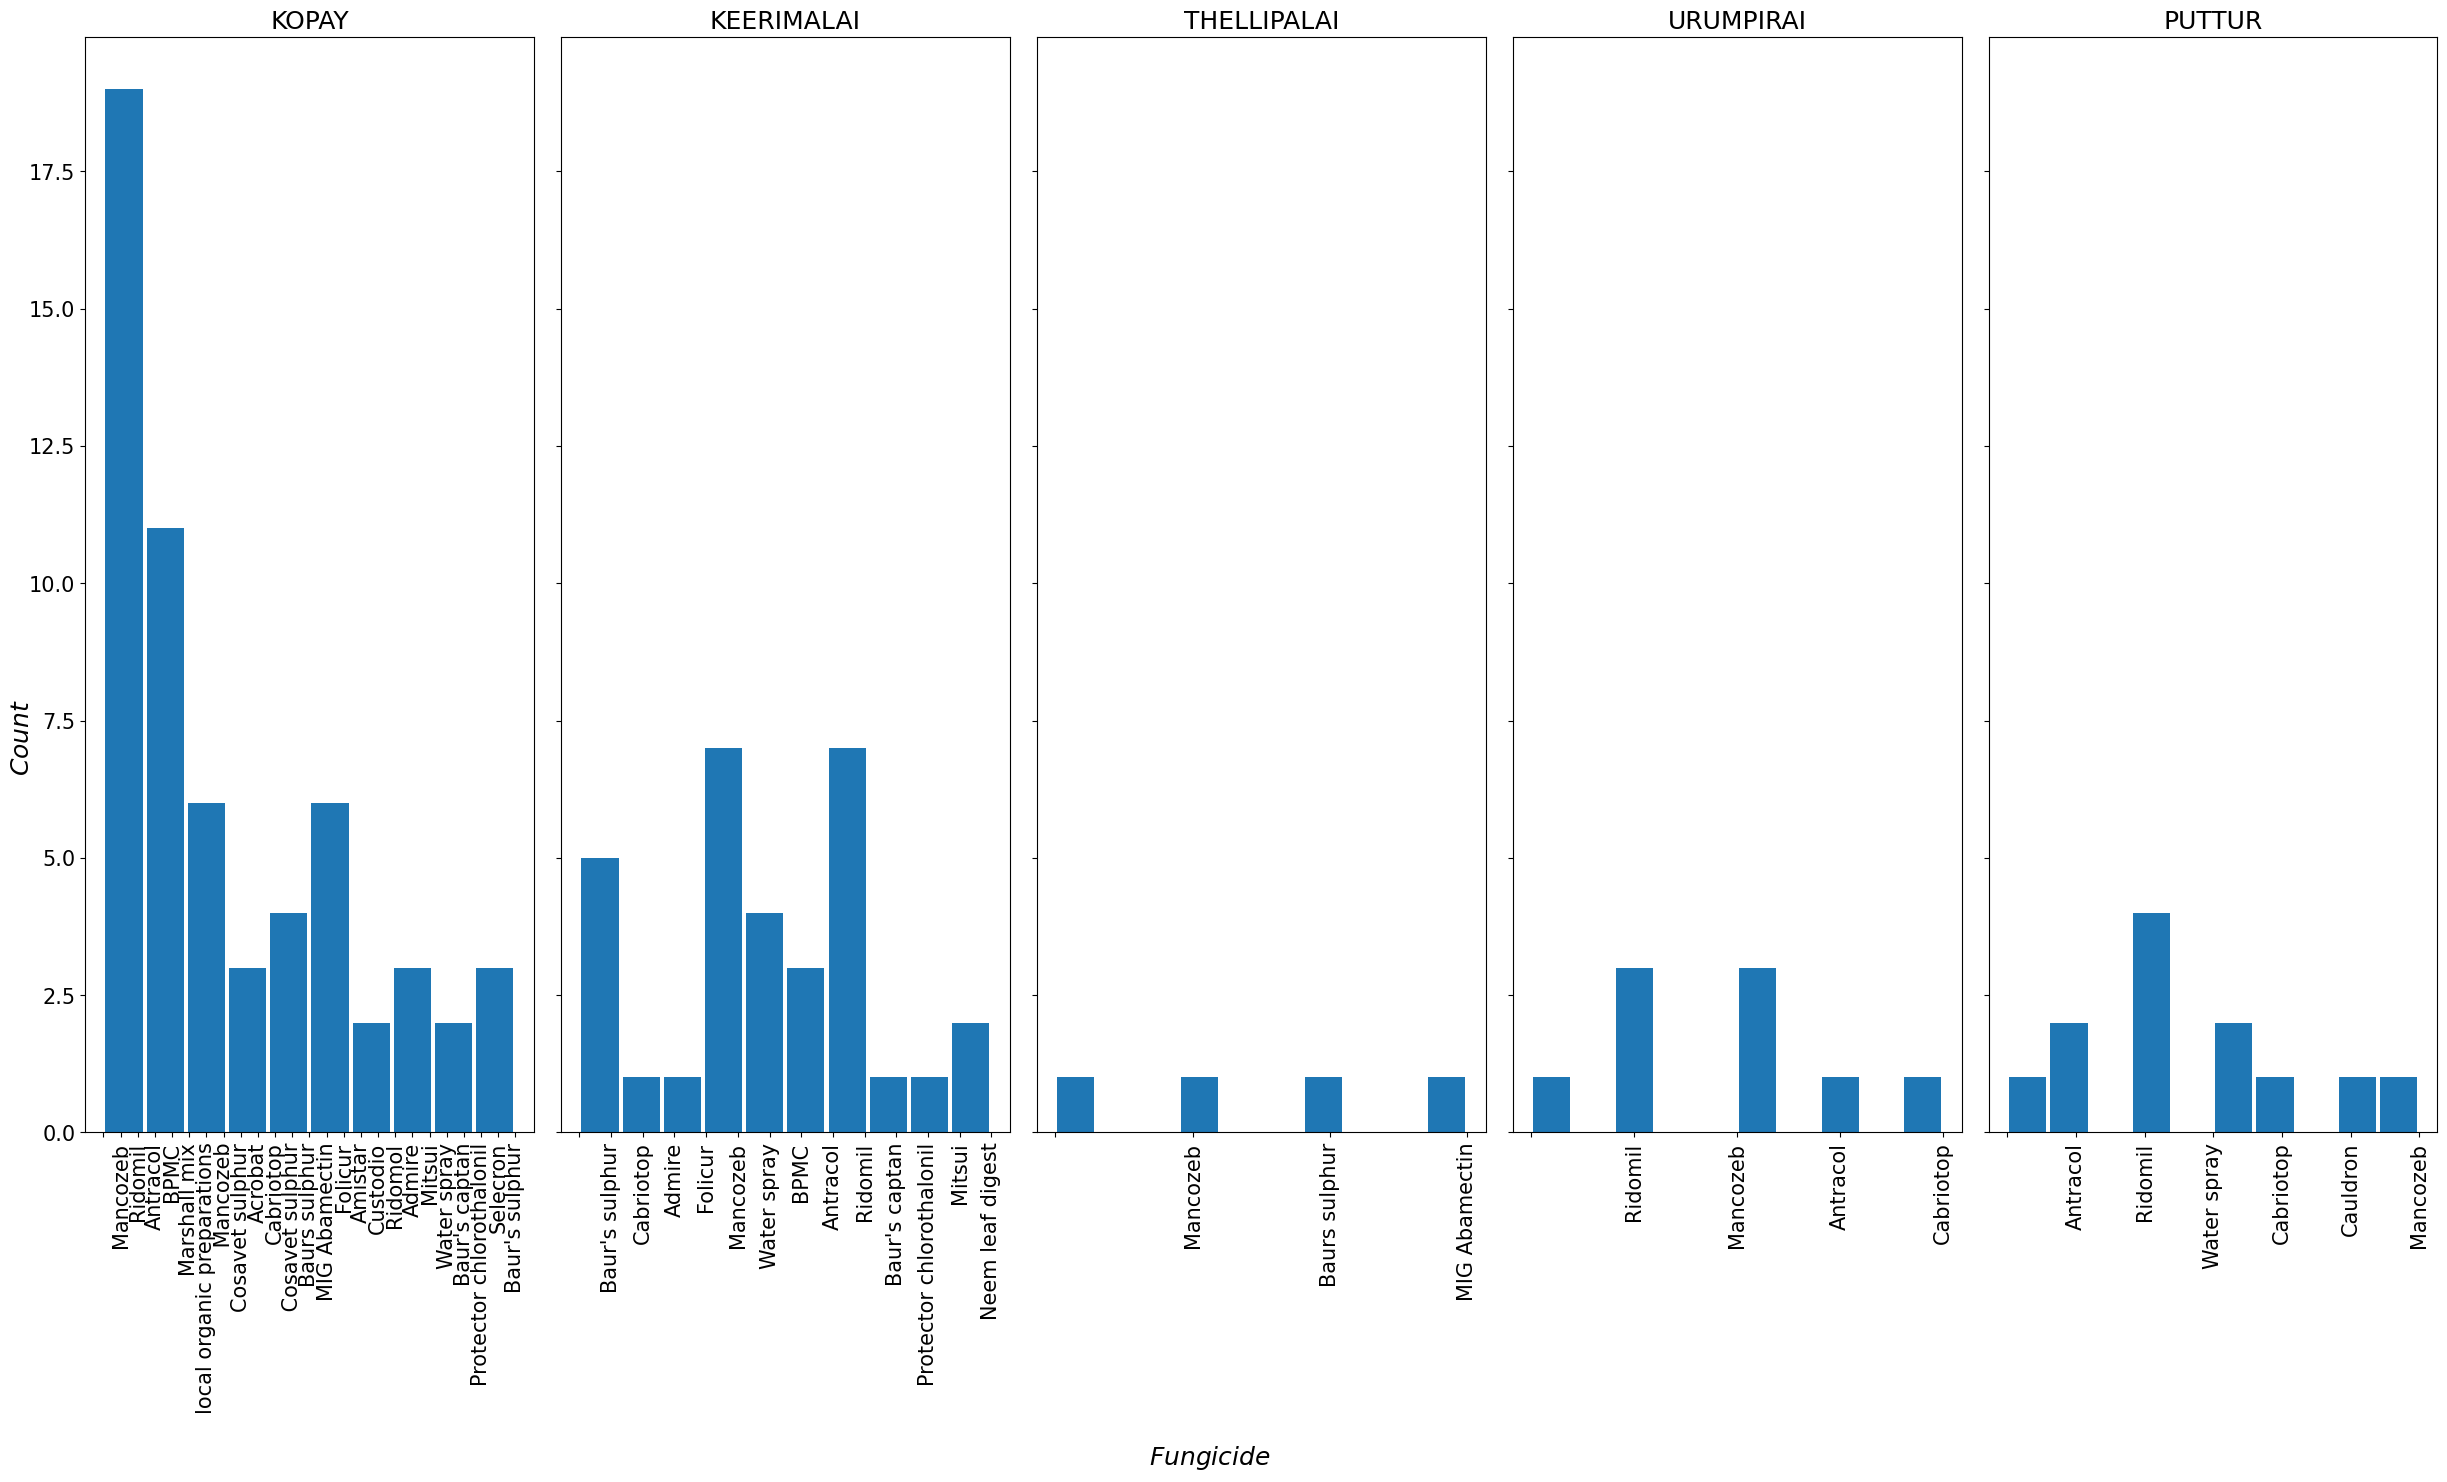

In [188]:
# 5 AI divisions
plt.rcParams["font.size"] = 15

fig, _axes = plt.subplots(nrows = 1, ncols = 5, sharey = True)
fig.set_size_inches(25, 15)
for axes, ai_div in zip(_axes, survey.AI_division.dropna().unique()):
    fcides = ""
    [fcides := fcides + ";" + fcide for fcide in survey.query("AI_division == @ai_div").fungicides.dropna()]
    fcides = fcides.split(";")
    axes.hist(fcides, rwidth = 0.9)
    axes.set_title(ai_div.upper())
    axes.set_xticklabels(labels = axes.get_xticklabels(), rotation = 90);
    

fig.supxlabel("$Fungicide$")    
fig.supylabel("$Count$")
plt.tight_layout()
plt.show()